In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Imagetrain/cotton'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Imagetrain/cotton


In [ ]:
!ls

test  train  val


In [2]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'val'

In [ ]:
##setting the weights as of the imagenet and not including the fully connected layers
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
##no need to train the convolution layers
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('train/*')

In [ ]:
folders1 = glob('val/*')

In [ ]:
folders

['train/diseased cotton leaf',
 'train/fresh cotton leaf',
 'train/diseased cotton plant',
 'train/fresh cotton plant']

In [ ]:
folders1

['val/diseased cotton plant',
 'val/diseased cotton leaf',
 'val/fresh cotton leaf',
 'val/fresh cotton plant']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inception.input,prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


##Doing Augmentation and scaling for the train data and only scaling on test data

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

## Setting the path for training and testing

In [ ]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# fit the model
final = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 262s 4s/step - loss: 3.0598 - accuracy: 0.7324 - val_loss: 1.6486 - val_accuracy: 0.7531
Epoch 2/20
61/61 [==============================] - 264s 4s/step - loss: 0.7275 - accuracy: 0.8842 - val_loss: 0.6800 - val_accuracy: 0.8858
Epoch 3/20
61/61 [==============================] - 262s 4s/step - loss: 0.6585 - accuracy: 0.8913 - val_loss: 1.1233 - val_accuracy: 0.8210
Epoch 4/20
61/61 [==============================] - 261s 4s/step - loss: 0.6081 - accuracy: 0.9134 - val_loss: 0.8788 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 266s 4s/step - loss: 0.4276 - accuracy: 0.9405 - val_loss: 0.4157 - val_accuracy: 0.9290
Epoch 6/20
61/61 [==============================] - 262s 4s/step - loss: 0.4254 - accuracy: 0.9329 - val_loss: 0.5464 - val_accuracy: 0.9259
Epoch 7/20
61/61 [==============================] - 262s 4s/step - loss: 0.743

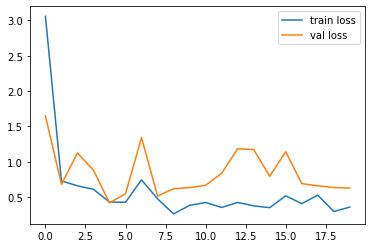

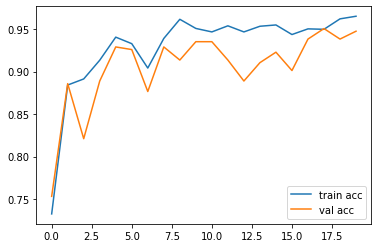

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(final.history['loss'], label='train loss')
plt.plot(final.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(final.history['accuracy'], label='train acc')
plt.plot(final.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
##Saving the model
model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[2.2023623e-25, 1.0000000e+00, 1.1158376e-20, 3.1321564e-19],
       [2.2558765e-17, 1.6202165e-18, 6.5685041e-02, 9.3431503e-01],
       [2.5532159e-05, 1.1691384e-10, 9.9905556e-01, 9.1890310e-04],
       ...,
       [1.0000000e+00, 1.9958681e-21, 6.7331849e-36, 3.5849308e-34],
       [2.4732540e-19, 1.0000000e+00, 2.0439607e-23, 5.7809299e-26],
       [1.0149326e-02, 3.7831200e-18, 9.8985064e-01, 1.1896584e-17]],
      dtype=float32)

In [ ]:
##Taking the index of the max value
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 0, 0, 2, 3, 3, 3, 2, 3, 0, 0, 1,
       3, 1, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 3, 3, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 1, 3, 3, 0, 2, 1, 3, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 1,
       3, 3, 0, 1, 2, 0, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 3, 2, 1, 1, 0, 3,
       0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 3, 3, 3, 1, 0, 3, 1, 3, 0, 2, 3, 1,
       2, 3, 2, 0, 2, 2, 1, 2, 3, 0, 1, 2, 3, 2, 0, 3, 3, 3, 0, 1, 1, 3,
       3, 2, 3, 1, 1, 3, 2, 1, 1, 3, 0, 1, 1, 2, 1, 1, 0, 0, 3, 0, 1, 3,
       3, 1, 2, 1, 0, 2, 0, 2, 3, 3, 3, 0, 2, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 3, 3, 0, 2, 0, 1, 1, 0, 0, 3, 3, 3, 0,
       0, 2, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 3, 3, 2,
       3, 0, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 0, 2, 3, 0,
       3, 2, 0, 2, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2,
       3, 0, 3, 3, 2, 1, 1, 2, 0, 1, 0, 3, 2, 2, 2, 3, 2, 1, 0, 1, 1, 2,
       3, 1, 3, 3, 0, 2, 3, 1, 1, 0, 2, 0, 0, 1, 0,

##Testing on Images

fresh cotton leaf


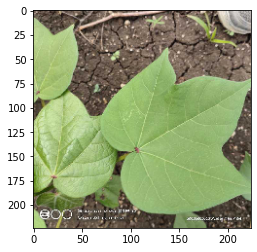

In [8]:
img = image.load_img("val/fresh cotton leaf/d (8)_iaip.jpg",target_size=(224,224)) ##loading the image
img = np.asarray(img) ##converting to an array
img = img / 255 ##scaling by doing a division of 255
plt.imshow(img)
img = np.expand_dims(img, axis=0) ##expanding the dimensions
from keras.models import load_model
saved_model = load_model("model_inception.h5") ##loading the model
output = saved_model.predict(img)
output = np.argmax(output, axis=1) ##Taking the index of the maximum value
if output[0] == 0 :
  print('diseased cotton leaf')
elif output[0] == 1:
  print('diseased cotton plant')
elif output[0] == 2 :
  print('fresh cotton leaf')
else:
  print('fresh cotton plant')

diseased cotton plant


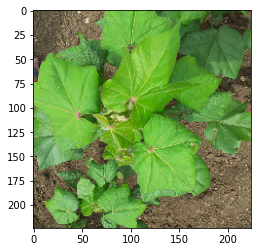

In [10]:
img1 = image.load_img("val/diseased cotton plant/dd (21)_iaip.jpg",target_size=(224,224)) ##loading the image
img1 = np.asarray(img1) ##converting to an array
img1 = img1 / 255 ##scaling by doing a division of 255
plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0) ##expanding the dimensions
output = saved_model.predict(img1)
output = np.argmax(output, axis=1)
if output[0] == 0 :
  print('diseased cotton leaf')
elif output[0] == 1:
  print('diseased cotton plant')
elif output[0] == 2 :
  print('fresh cotton leaf')
else:
  print('fresh cotton plant')

diseased cotton leaf


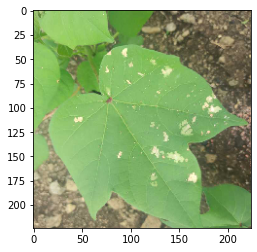

In [11]:
img2 = image.load_img("val/diseased cotton leaf/dis_leaf (33)_iaip.jpg",target_size=(224,224)) ##loading the image
img2 = np.asarray(img2) ##converting to an array
img2 = img2 / 255 ##scaling by doing a division of 255
plt.imshow(img2)
img2 = np.expand_dims(img2, axis=0) ##expanding the dimensions
output = saved_model.predict(img2)
output = np.argmax(output, axis=1)
if output[0] == 0 :
  print('diseased cotton leaf')
elif output[0] == 1:
  print('diseased cotton plant')
elif output[0] == 2 :
  print('fresh cotton leaf')
else:
  print('fresh cotton plant')

diseased cotton plant


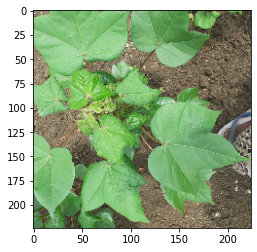

In [14]:
img3 = image.load_img("val/diseased cotton plant/dd (46)_iaip.jpg",target_size=(224,224)) ##loading the image
img3 = np.asarray(img3) ##converting to an array
img3 = img3 / 255 ##scaling by doing a division of 255
plt.imshow(img3)
img3 = np.expand_dims(img3, axis=0) ##expanding the dimensions
output = saved_model.predict(img3)
output = np.argmax(output, axis=1)
if output[0] == 0 :
  print('diseased cotton leaf')
elif output[0] == 1:
  print('diseased cotton plant')
elif output[0] == 2 :
  print('fresh cotton leaf')
else:
  print('fresh cotton plant')

fresh cotton plant


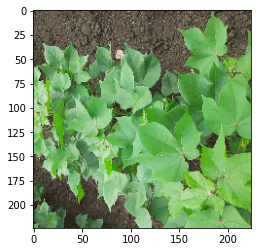

In [15]:
img4 = image.load_img("val/fresh cotton plant/dsd (160)_iaip.jpg",target_size=(224,224)) ##loading the image
img4 = np.asarray(img4) ##converting to an array
img4 = img4 / 255 ##scaling by doing a division of 255
plt.imshow(img4)
img4 = np.expand_dims(img4, axis=0) ##expanding the dimensions
output = saved_model.predict(img4)
output = np.argmax(output, axis=1)
if output[0] == 0 :
  print('diseased cotton leaf')
elif output[0] == 1:
  print('diseased cotton plant')
elif output[0] == 2 :
  print('fresh cotton leaf')
else:
  print('fresh cotton plant')